In [ ]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils.np_utils import to_categorical
import VariantCalling as vc
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_row, img_col = 101, 178
nb_epoch = 50
batch_size = 16
nb_filters = 24
nb_conv = 5
nb_pool = 5

Progress:  0.0%% completed. 	Computing alignment 0 of 10
[0.0990211867840765, 0.3156962410460331, 0.5852825721698903]


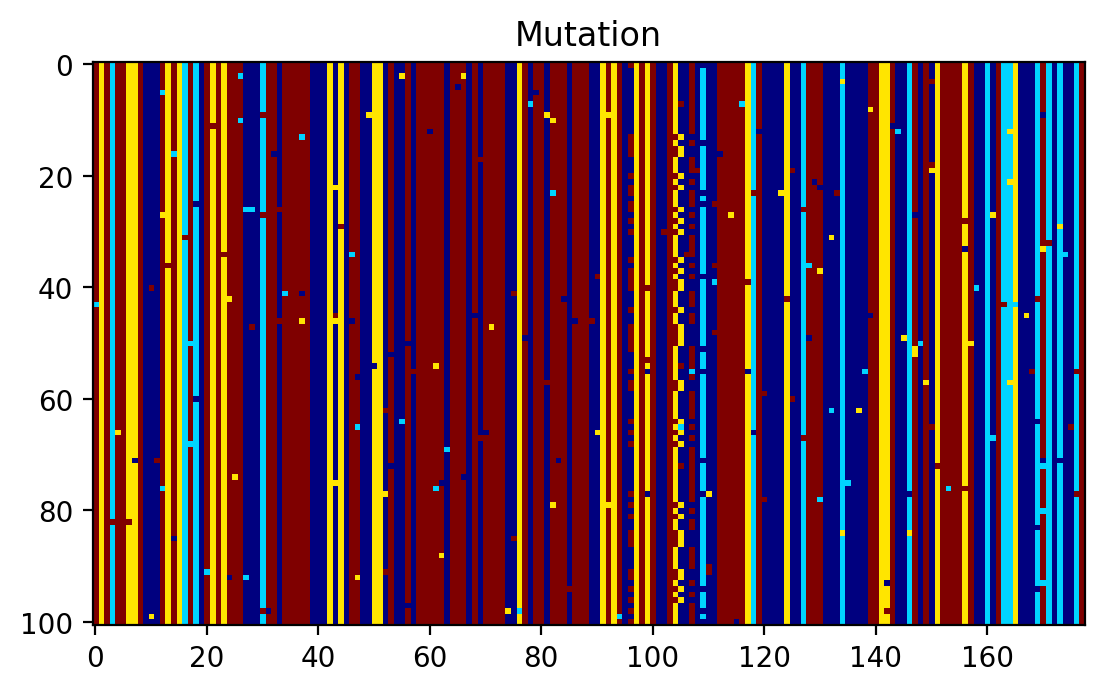

In [ ]:
"""
This section to test ratio_gen, which is wrapper for alignments
"""
dg = vc.VariantCallingData()
alignments, prob_lists = dg.simulate_clones(10,100,0.01,0.01)
alignments_int = dg.char_to_int(alignments)
alignment_int = dg.char_to_int(alignments[0])
plt.rcParams['figure.dpi'] = 200
#alignment_idx = mutation_types.index(mutation_index)
plt.title("Mutation")
plt.imshow(alignment_int,cmap='jet')
print(prob_lists[0])

In [ ]:
"""
This section to test ratio_gen, which is wrapper for alignments
"""
dg = vc.VariantCallingData()
alignments, prob_lists = dg.simulate_clones(2000,100,0.01,0.01)


Progress:  0.0%% completed. 	Computing alignment 0 of 2000
Progress:  20.0%% completed. 	Computing alignment 400 of 2000
Progress:  40.0%% completed. 	Computing alignment 800 of 2000
Progress:  60.0%% completed. 	Computing alignment 1200 of 2000
Progress:  80.0%% completed. 	Computing alignment 1600 of 2000


In [ ]:
print(len(alignments[0]))
alignments = [dg._array_dup(i,101) for i in alignments]
print(len(alignments))
print(alignments[8].shape)
print(alignments[8])
alignments_int = dg.char_to_int(alignments)

101
2000
(2, 101, 178)
[[['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]

 [['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]]


In [ ]:
print(alignments[8].shape)
print(alignments[8])
alignments_int = dg.char_to_int(alignments)

(2, 101, 178)
[[['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]

 [['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]]


In [ ]:
rng = np.random.default_rng(seed=42) # use a fixed random generator so runs are consistent
idxs = np.arange(alignments_int.shape[0])

rng.shuffle(idxs)

split_idx = int(alignments_int.shape[0]*0.8)
train_alignments, valid_alignments = alignments_int[idxs[:split_idx]], alignments_int[idxs[split_idx:]]
train_prob_lists, valid_prob_lists = np.array(prob_lists)[idxs[:split_idx]], np.array(prob_lists)[idxs[split_idx:]]
#train_mutation_types, valid_mutation_types = mutation_types[idxs[:split_idx]], mutation_types[idxs[split_idx:]]
print(train_alignments.shape)
print(train_prob_lists.shape)

(1600, 2, 101, 178)
(1600, 3)


In [ ]:
img_row = 101
img_col = 178
print(train_alignments.shape)
print(valid_alignments.shape)


train_alignments = train_alignments.reshape(train_alignments.shape[0], img_row, img_col, 2)
valid_alignments = valid_alignments.reshape(valid_alignments.shape[0], img_row, img_col, 2)

train_alignments = train_alignments.astype('float32')
valid_alignments = valid_alignments.astype('float32')

train_alignments /= 3
valid_alignments /= 3


(1600, 2, 101, 178)
(400, 2, 101, 178)


In [ ]:
model = Sequential()
model.add(Conv2D(nb_filters, nb_conv, nb_conv))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, nb_conv, nb_conv,padding="same"))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool),padding="same"))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, nb_conv, nb_conv,padding="same"))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool),padding="same"))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(metrics=['mse'],loss='categorical_crossentropy',optimizer='adam')

In [ ]:
trained_model = model.fit(train_alignments, train_prob_lists, batch_size = batch_size, epochs = 500,  verbose = 1, validation_data = (valid_alignments, valid_prob_lists))

Epoch 1/500
100/100 [==============================] - 7s 10ms/step - loss: 1.0990 - mse: 0.0322 - val_loss: 1.0985 - val_mse: 0.0314
Epoch 2/500
100/100 [==============================] - 1s 7ms/step - loss: 1.0986 - mse: 0.0321 - val_loss: 1.0978 - val_mse: 0.0313
Epoch 3/500
100/100 [==============================] - 1s 6ms/step - loss: 1.0719 - mse: 0.0266 - val_loss: 1.0424 - val_mse: 0.0202
Epoch 4/500
100/100 [==============================] - 1s 7ms/step - loss: 1.0338 - mse: 0.0188 - val_loss: 1.0157 - val_mse: 0.0142
Epoch 5/500
100/100 [==============================] - 1s 7ms/step - loss: 0.9990 - mse: 0.0111 - val_loss: 0.9776 - val_mse: 0.0058
Epoch 6/500
100/100 [==============================] - 1s 7ms/step - loss: 0.9772 - mse: 0.0066 - val_loss: 0.9637 - val_mse: 0.0035
Epoch 7/500
100/100 [==============================] - 1s 6ms/step - loss: 0.9677 - mse: 0.0048 - val_loss: 0.9593 - val_mse: 0.0027
Epoch 8/500
100/100 [==============================] - 1s 6ms/step -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (16, 20, 35, 24)          1224      
                                                                 
 max_pooling2d (MaxPooling2D  (16, 4, 7, 24)           0         
 )                                                               
                                                                 
 activation (Activation)     (16, 4, 7, 24)            0         
                                                                 
 conv2d_1 (Conv2D)           (16, 1, 2, 24)            14424     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 1, 1, 24)           0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (16, 1, 1, 24)            0

In [16]:
with open('output.csv', 'w') as file:
    predict_array = model.predict(valid_alignments).tolist()
    for i in range(0, len(valid_prob_lists)):
        file.write("\nPredicted\n")
        file.write(str(predict_array[i]))
        file.write("\nActual\n")
        file.write(str(valid_prob_lists[i]))

13/13 [==============================] - 0s 4ms/step
